# Neural Networks in PyTorch

In [1]:
# import needed packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms # MNIST dataset here

import helper

In [10]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5],[0.5])])

# Download and load train set
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load test set
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

Text(0.5, 1.0, 'This is 3')

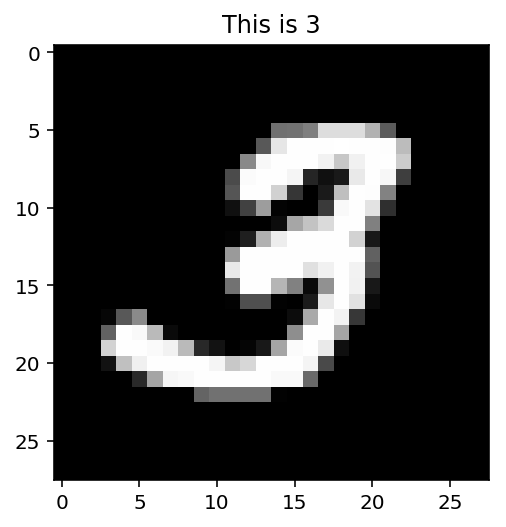

In [36]:
i = 63

plt.imshow(images[i].numpy().squeeze(), cmap='Greys_r')
plt.title(f"This is {labels[i].item()}")

## Building networks with PyTorch

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the image.

<img src="assets/mlp_mnist.png" width=600px>

To build a neural network with PyTorch, you use the `torch.nn` module. The network itself is a class inheriting from `torch.nn.Module`. You define each of the operations separately, like `nn.Linear(784, 128)` for a fully connected linear layer with 784 inputs and 128 units.

The class needs to include a `forward` method that implements the forward pass through the network. In this method, you pass some input tensor `x` through each of the operations you defined earlier. The `torch.nn` module also has functional equivalents for things like ReLUs in `torch.nn.functional`. This module is usually imported as `F`. Then to use a ReLU activation on some layer (which is just a tensor), you'd do `F.relu(x)`. Below are a few different commonly used activation functions.

<img src="assets/activation.png" width=700px>

So, for this network, I'll build it with three fully connected layers, then a softmax output for predicting classes. The softmax function is similar to the sigmoid in that it squashes inputs between 0 and 1, but it's also normalized so that all the values sum to one like a proper probability distribution.

### It is time to build a Neural Network :)))

In [37]:
# Import some modules from PyTorch
from torch import nn 
import torch.nn.functional as F

In [38]:
# First you create a class that iherits from nn.Module
class Network(nn.Module):
    def __init__(self):
        super().__init__() # because of super() we can call whatever method we want from superclass (here we call constructor)
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        """
        Parameters:
        x - PyTorch tensor
        
        """
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim= 1 )
        
        return x
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### it is time to initialize weights and bias
Generally weights and biases are automatically initialized.

In [44]:
print(model.fc1.weight.shape)
print(model.fc1.bias)

torch.Size([128, 784])
Parameter containing:
tensor([ 8.7857e-05,  1.2188e-02, -2.9044e-02,  2.8342e-02,  2.7584e-02,
        -1.7392e-02, -1.6925e-02,  2.4747e-02,  4.9112e-03,  3.5342e-02,
         5.9696e-03, -2.5332e-03,  1.6598e-02,  2.4213e-02, -2.2147e-02,
        -2.1251e-03, -4.6490e-03, -2.0988e-02, -7.0309e-03, -3.4989e-02,
         3.1955e-02,  2.8234e-02,  2.2238e-02, -1.9791e-02,  2.2130e-02,
        -1.7964e-02,  2.1568e-03,  1.3202e-02, -2.3214e-02, -8.0854e-03,
         1.2085e-02, -1.2708e-02, -1.8173e-03,  2.5223e-03,  3.3625e-02,
        -6.0769e-03,  1.0808e-02,  2.7938e-02, -1.3097e-02, -1.6603e-02,
         3.1150e-02, -9.6732e-03, -1.5060e-02,  7.9603e-03,  1.3468e-02,
        -2.0695e-02,  3.3627e-02,  8.8708e-03, -4.6857e-05,  7.9650e-03,
         1.1668e-02, -3.0162e-02, -3.1440e-02,  1.1115e-02, -1.9423e-02,
         2.5197e-02,  1.9556e-03, -1.2896e-03, -1.7629e-02,  2.1118e-02,
        -4.8061e-03, -1.7479e-03, -2.6653e-02, -2.2557e-02, -4.7809e-03,
      

 But there is an option to customize that.

In [45]:
# Set all biases for first layer to 0
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
# Normalize all random weights for alayer 1
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0235, -0.0066,  0.0115,  ..., -0.0081, -0.0129,  0.0021],
        [-0.0005, -0.0038, -0.0049,  ...,  0.0216,  0.0107, -0.0020],
        [ 0.0001, -0.0032, -0.0002,  ..., -0.0115, -0.0077,  0.0160],
        ...,
        [ 0.0043,  0.0009,  0.0034,  ...,  0.0048, -0.0072,  0.0018],
        [ 0.0064,  0.0067, -0.0204,  ..., -0.0086,  0.0097,  0.0085],
        [ 0.0104, -0.0051,  0.0070,  ..., -0.0045, -0.0118, -0.0098]])

### Forward pass

In [65]:
images, labels = next(iter(trainloader))

In [66]:
images.shape

torch.Size([64, 1, 28, 28])

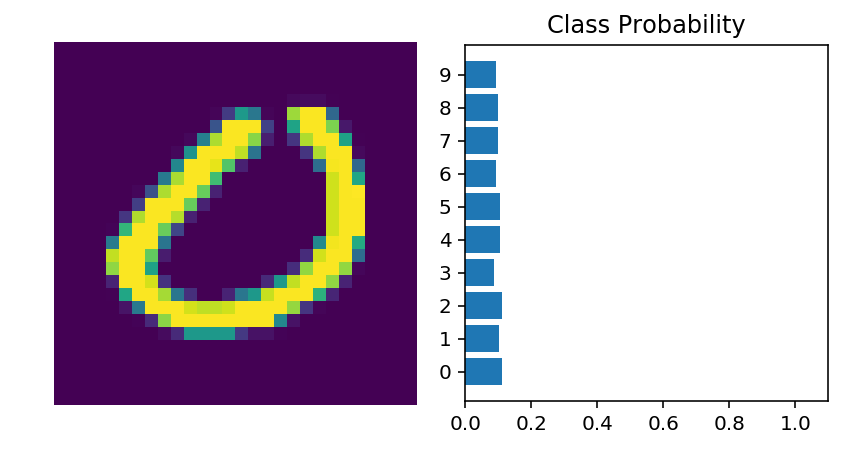

In [67]:
# here we resize current batch in such way that we change input image(matrix) into vector
images.resize_(images.shape[0],images.shape[1], images.shape[2] * images.shape[3])

# here we call method forward on first image from batch
probabilities = model.forward(images[0])

# now we use helper function written by teacher to display probability distribution
# we need to convert it back to 28 x28 in order to display it so we use .view() method which COPIES tht tensor an resizes it
# .view() is the same as .resize_(), but the latter one resizes IN-PLACE where the first COPIES Torch Tensor
helper.view_classify(images[0].view(1, 28, 28), probabilities)

So for now netowrk has no idea what is that digit. It is because we did not start training yet and the weigts are from normal distribution for now.

### nn.Sequential Class - convienient way to build networks

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


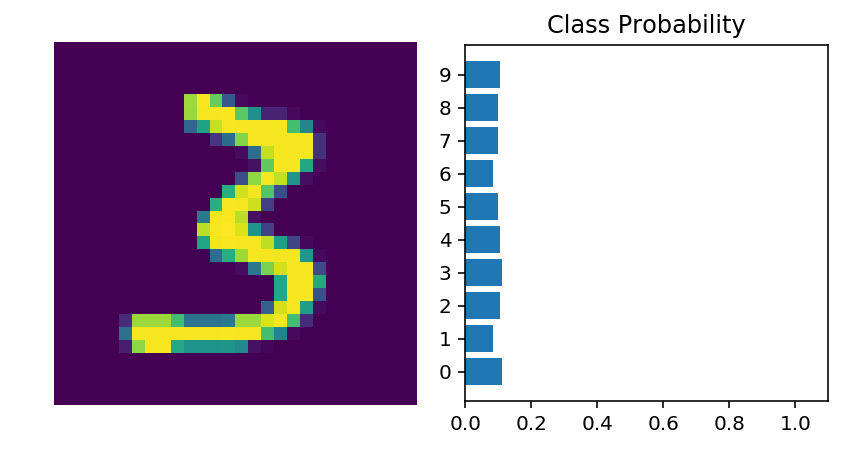

In [77]:
#Defining hyperparameters
input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the netwrok 
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0])
helper.view_classify(images[0].view(1,28,28), ps)

In [79]:
# We can pass order dictionary 
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
    ("fc1", nn.Linear(input_size, hidden_size[0])),
    ("relu1",nn.ReLU()),
    ("fc2", nn.Linear(hidden_size[0], hidden_size[1])),
    ("relu2", nn.ReLU()),
    ("output", nn.Linear(hidden_size[1], output_size)),
    ("softmax", nn.Softmax(dim=1))
    
]))

model.output

Linear(in_features=64, out_features=10, bias=True)

In [ ]:
# Excercise
